In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [5]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=0.2, random_state = 4)

In [8]:
X_train

1457    U sleeping now.. Or you going to take? Haha.. ...
472     How long has it been since you screamed, princ...
2481    Urgent! call 09066612661 from landline. Your c...
243     Okay. No no, just shining on. That was meant t...
1413    Wen ur lovable bcums angry wid u, dnt take it ...
                              ...                        
3671                        Ok thanx... Take care then...
709     To review and KEEP the fantastic Nokia N-Gage ...
2487           I dont thnk its a wrong calling between us
174     Bloody hell, cant believe you forgot my surnam...
1146    Thank you, winner notified by sms. Good Luck! ...
Name: Message, Length: 4457, dtype: object

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [10]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [12]:
from sklearn.metrics import classification_report

y_true=y_test
y_pred=clf.predict(X_test)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       947
           1       0.96      0.90      0.93       168

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Text(134.52, 0.5, 'Predicted')

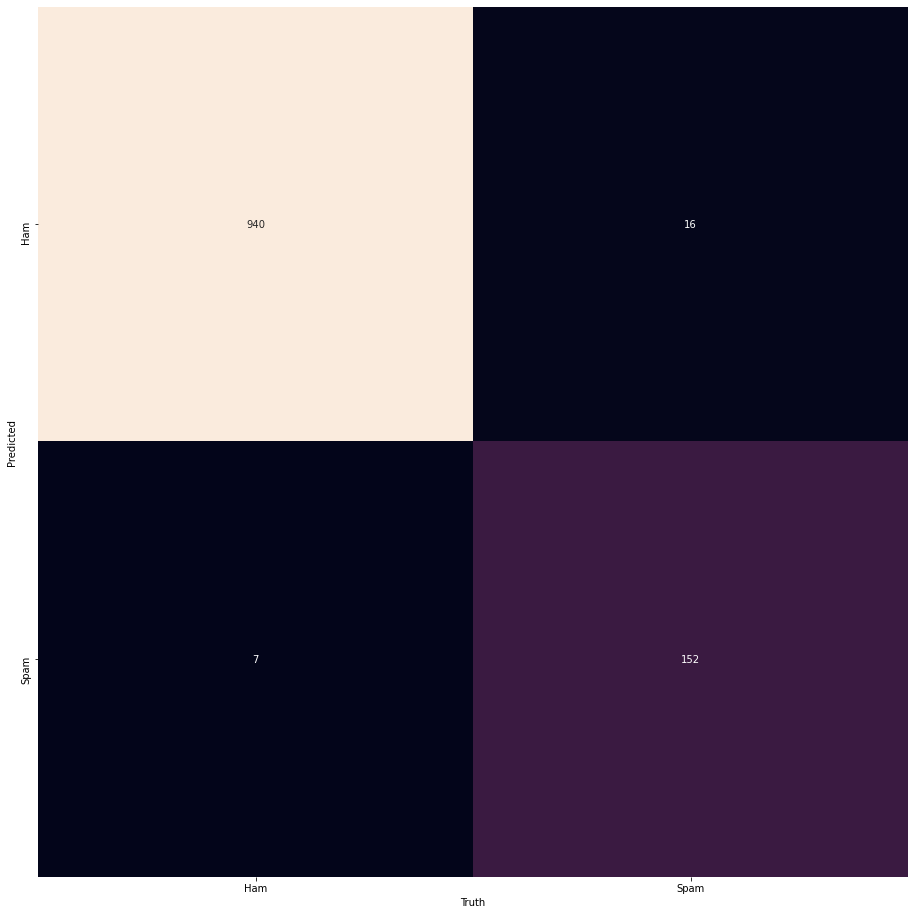

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,16))
category = ['Ham', 'Spam']
cm = confusion_matrix(y_true, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=False, square=True, xticklabels=category, yticklabels=category)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [14]:
def predict_category(s):
    x = clf.predict([s])
    if x==0:
        x='Ham'
    else:
        x='Spam'
    return x

In [15]:
predict_category('Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!')

'Spam'

In [16]:
predict_category('Hey mohan, can we get together to watch footbal game tomorrow?')

'Ham'